<a href="https://colab.research.google.com/github/Ziad-o-Yusef/DataScience_Workshops/blob/main/DAPython_Car_Price_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle_MyAPI'

In [ ]:
! kaggle datasets download -d deepcontractor/car-price-prediction-challenge

  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 102MB/s]


In [ ]:
! unzip /content/car-price-prediction-challenge.zip

Archive:  /content/car-price-prediction-challenge.zip
  inflating: car_price_prediction.csv  


In [ ]:
df = pd.read_csv('/content/car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.shape

(19237, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [ ]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
df['ID'].duplicated().sum()

313

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

TypeError: ignored

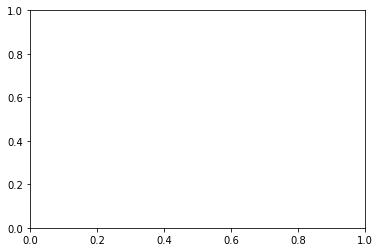

In [ ]:
fig = sns.kdeplot(df['Levy'],color = 'r')

In [ ]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [ ]:
df.shape[0]

19237

In [ ]:
for i in range(df.shape[0]):
  if df['Levy'][i] == '-':
    df['Levy'][i] = np.nan


df['Levy'] = df['Levy'].astype(np.float64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


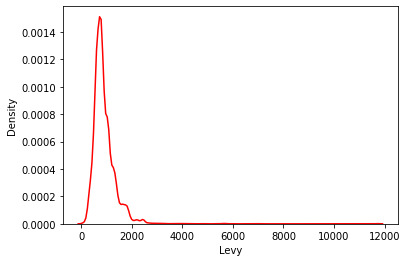

In [ ]:
fig = sns.kdeplot(df['Levy'],color = 'r')

In [ ]:
df['Category'].value_counts()

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


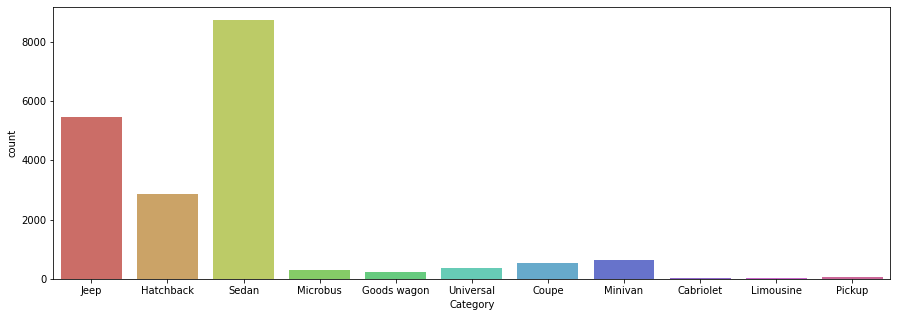

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(df['Category'],palette='hls')

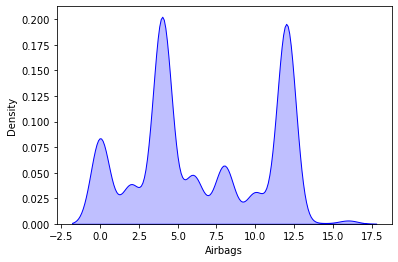

In [ ]:
fig = sns.kdeplot(df['Airbags'],shade = True,color = 'b')

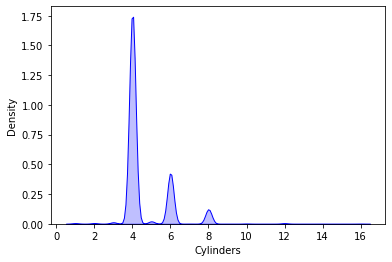

In [ ]:
fig = sns.kdeplot(df['Cylinders'],shade = True,color = 'b')

TypeError: ignored

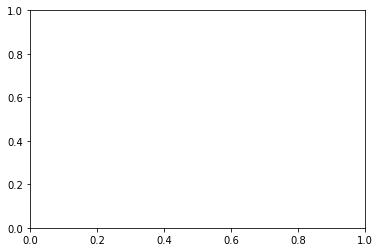

In [ ]:
fig = sns.kdeplot(df['Mileage'],shade = True,color = 'b')

In [ ]:
df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [ ]:
['25077','km']

In [ ]:
new_f = [float(value.split(' ')[0]) for value in df['Mileage']]
df['Mileage'] = new_f

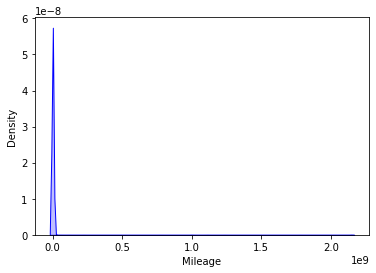

In [ ]:
fig = sns.kdeplot(df['Mileage'],shade = True,color = 'b')

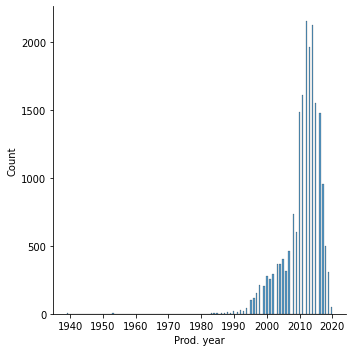

In [ ]:
sns.displot(df['Prod. year'])

In [ ]:
df['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [ ]:
new_f = [float(value.split(' ')[0]) for value in df['Engine volume']]
df['Engine volume'] = new_f

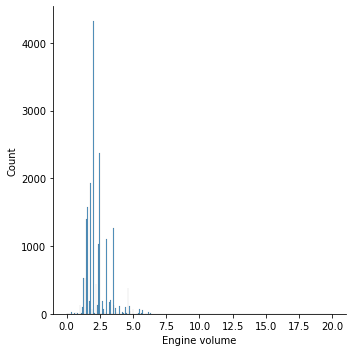

In [ ]:
sns.displot(df['Engine volume'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


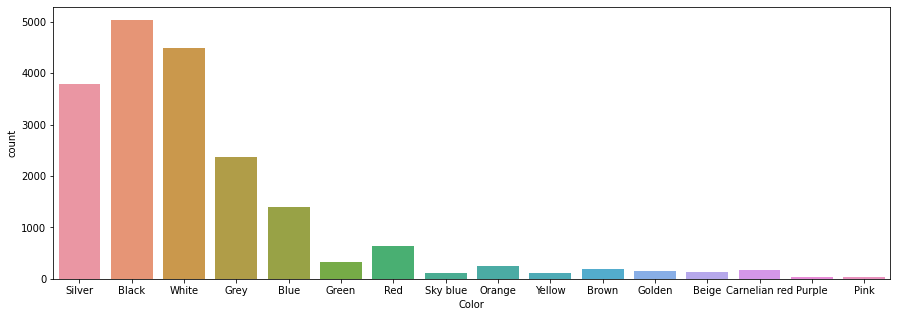

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(df['Color'])


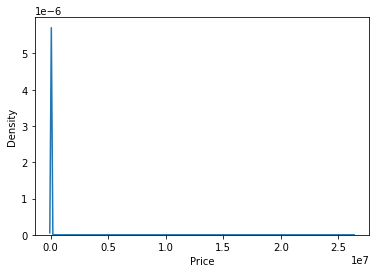

In [ ]:
sns.kdeplot(df['Price'])

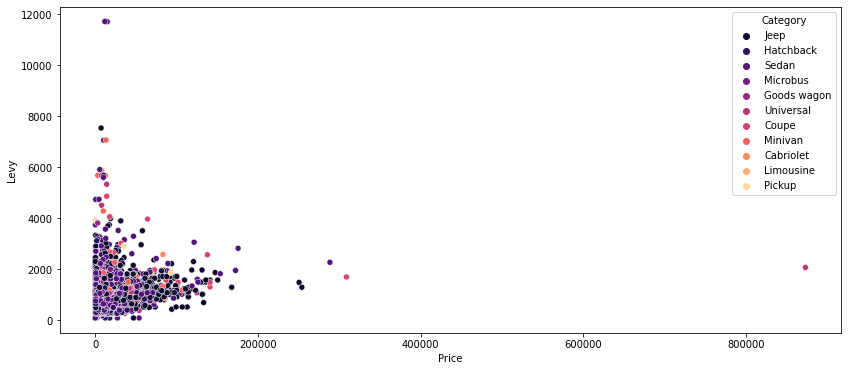

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='Price',y='Levy',data =df,hue ='Category',palette='magma' )

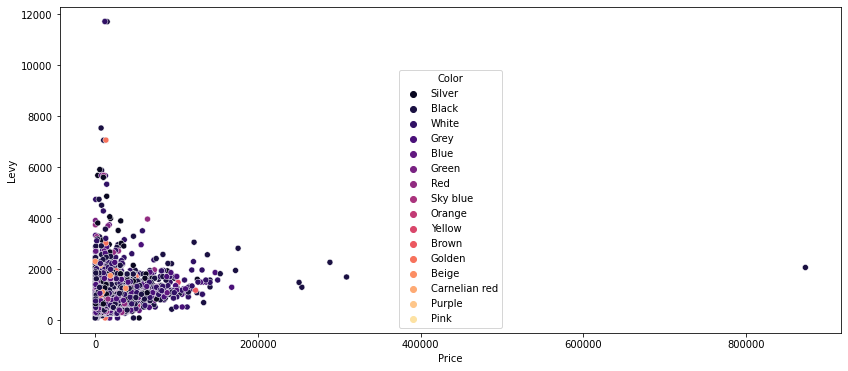

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='Price',y='Levy',data =df,hue ='Color',palette='magma' )

In [ ]:
df['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [ ]:
df.isna().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

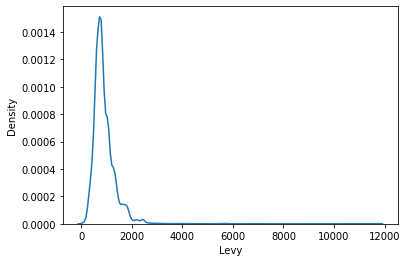

In [ ]:
sns.kdeplot(df['Levy'])

In [ ]:
df['Levy'].fillna(df['Levy'].mean(),inplace = True)

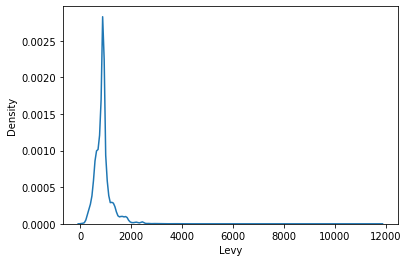

In [ ]:
sns.kdeplot(df['Levy'])

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

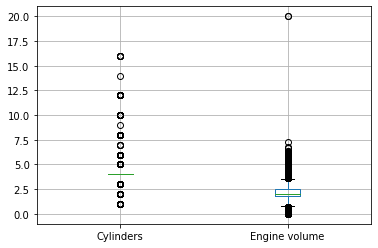

In [ ]:
df[['Cylinders','Engine volume']].boxplot()

In [ ]:
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 -1.5*iqr

In [ ]:
def handling_outliers(orignal_df,lst_of_columns) :
    for i in lst_of_columns:
        q1 = orignal_df[i].quantile(0.25)
        q3 = orignal_df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        for col in range(20,orignal_df.shape[0]):
            if orignal_df[i][col] < lower_bound :
                orignal_df[i][col]  = lower_bound
            elif orignal_df[i][col] > upper_bound :
                orignal_df[i][col]  = upper_bound
            else:
                continue 
    print("handling is done")            
    return orignal_df     
    
    
"""
function returnd list has just names of the continus featurs 
"""
    
def get_continus_list(df_):
    obj = df_.select_dtypes('object')
    lst = list(df_.columns)
    obj_lst = list(obj.columns)
    for i in obj_lst :
        lst.remove(i)
    return lst          

In [ ]:
df.select_dtypes('object').columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [ ]:
df.drop(columns=['ID'],inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
get_continus_list(df)

['index',
 'Price',
 'Levy',
 'Prod. year',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Airbags']

In [ ]:
dt = handling_outliers(df,get_continus_list(df))

handling is done


In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in df.select_dtypes('object').columns : 
  le= LabelEncoder()
  dt[i] = le.fit_transform(dt[i])

In [ ]:
dt.head()

,index,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,0,13328,1399.000000,32,1242,2010,4,1,2,3.5,186005.0,6.0,0,0,1,0,12,12
1,1,16621,1018.000000,8,658,2011,4,0,5,3.0,192000.0,6.0,2,0,1,0,1,8
2,2,8467,906.838128,21,684,2006,3,0,5,1.3,200000.0,4.0,3,1,1,1,1,2
3,3,3607,862.000000,16,661,2011,4,1,2,2.5,168966.0,4.0,0,0,1,0,14,0
4,4,11726,446.000000,21,684,2014,3,1,5,1.3,91901.0,4.0,0,1,1,0,12,4


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x =dt.drop(columns= ['Price'])
y = dt['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=32)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scale = ss.fit_transform(x_train)
x_test_scale = ss.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
gd = GradientBoostingRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [ ]:
gd.fit(x_train_scale,y_train)

GradientBoostingRegressor()

In [ ]:
pred = gd.predict(x_test_scale)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(pred,y_test)

0.2037347270107024

In [ ]:
rf.fit(x_train_scale,y_train)

RandomForestRegressor()

In [ ]:
pred = rf.predict(x_test_scale)

In [ ]:
r2_score(pred,y_test)

0.6721041224792905

In [ ]:
dt.fit(x_train_scale,y_train)

DecisionTreeRegressor()

In [ ]:
pred = dt.predict(x_test_scale)

In [ ]:
r2_score(pred,y_test)

0.5278913013637423